# Multiple Linear Regression in Statsmodels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives
You will be able to:
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Use standardization/normalization on features of a dataset
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Use statsmodels to fit a multiple linear regression model
* Evaluate a linear regression model by using statistical performance metrics pertaining to overall model and specific parameters


## The Ames Housing Data

Using the specified continuous and categorical features, preprocess your data to prepare for modeling:
* Split off and one hot encode the categorical features of interest
* Log and scale the selected continuous features

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

ames = pd.read_csv('ames.csv')

continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']


In [2]:
continuous_df = ames[continuous]
categoricals_df = ames[categoricals]

## Continuous Features

In [3]:
# Log transform and normalize

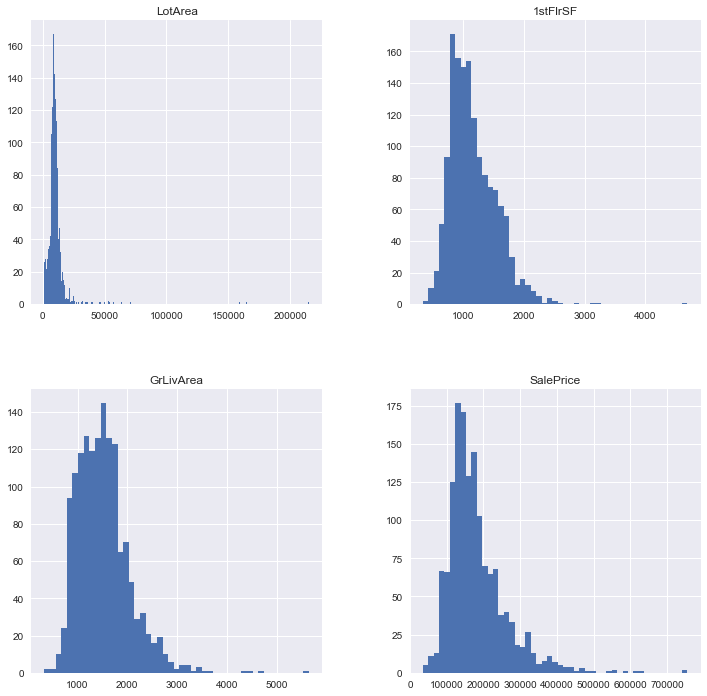

In [4]:
# visual check for outliers
continuous_df.hist(figsize = [12,12], bins='auto')
plt.show()

In [5]:
# all variables have outliers, remove outliers from entire df
def remove_outliers_from_pdDataFrame(df):
    return df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

continuous_filtered = remove_outliers_from_pdDataFrame(continuous_df)

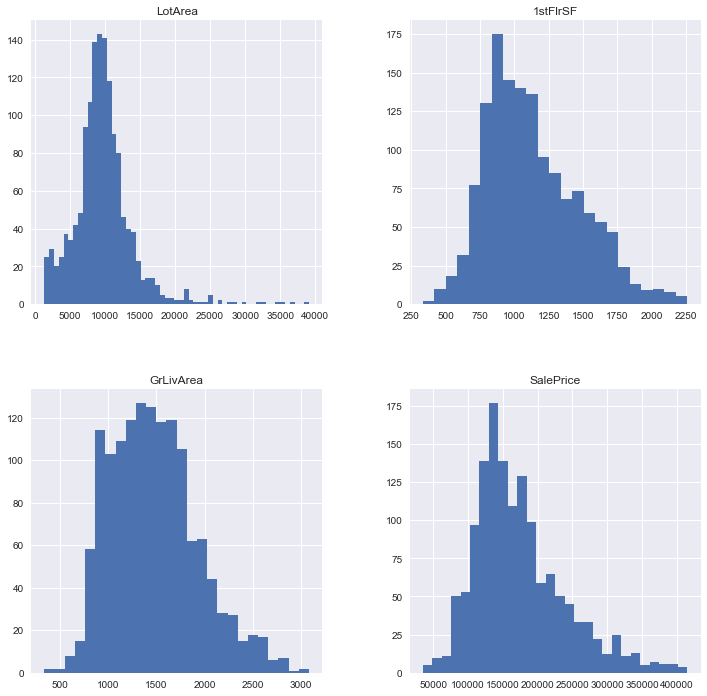

In [6]:
# visual check for after outliers removed
continuous_filtered.hist(figsize = [12,12], bins='auto')
plt.show()

In [7]:
# log transform
cont_log_df = np.log(continuous_filtered)

#check
cont_log_df

,LotArea,1stFlrSF,GrLivArea,SalePrice
0,9.041922,6.752270,7.444249,12.247694
1,9.169518,7.140453,7.140453,12.109011
2,9.328123,6.824374,7.487734,12.317167
3,9.164296,6.867974,7.448334,11.849398
4,9.565214,7.043160,7.695303,12.429216
...,...,...,...,...
1455,8.976768,6.859615,7.406711,12.072541
1456,9.486076,7.636752,7.636752,12.254863
1457,9.109636,7.080026,7.757906,12.493130
1458,9.181632,6.982863,6.982863,11.864462


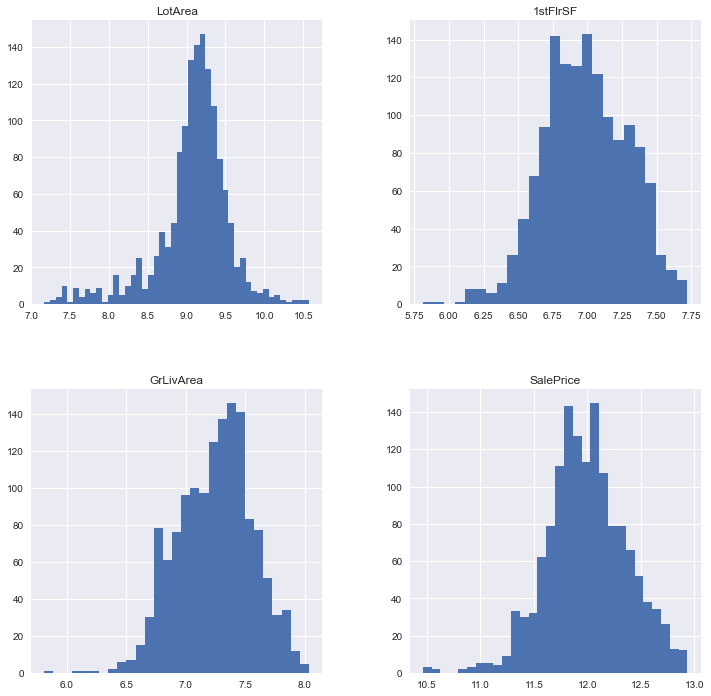

In [8]:
# visual check after log transform
cont_log_df.hist(figsize = [12,12], bins='auto')
plt.show()

### Standardization
When 

$x' = \dfrac{x - \bar x}{\sigma}$

x' will have mean $\mu = 0$ and $\sigma = 1$

Note that standardization does not make data $more$ normal, it will just change the mean and the standard error!

### Mean normalization
When performing mean normalization, you use the following formula:

$x' = \dfrac{x - \text{mean}(x)}{\max(x)-\min(x)}$

The distribution will have values between -1 and 1, and a mean of 0.

### Min-max scaling
When performing min-max scaling, you can transform x to get the transformed $x'$ by using the formula:

$x' = \dfrac{x - \min(x)}{\max(x)-\min(x)}$

This way of scaling brings all values between 0 and 1. 


In [9]:
# standardize
def standardize(feature):
    return (feature - feature.mean()) / feature.std()

cont_standardize_df = cont_log_df.apply(standardize)

In [10]:
# OR mean normalization
def mean_normalization(feature):
    return (feature - feature.mean()) / (feature.max()-feature.min())

cont_mean_norm_df = cont_log_df.apply(mean_normalization)
# dont plot this, this is for visual comparison only, as a learning aid for me to understand differences

In [11]:
# OR min max scaling
def min_max_scaling(feature):
    return (feature - feature.min()) / (feature.max()-feature.min())

cont_min_max_df = cont_log_df.apply(min_max_scaling)
# dont plot this, this is for visual comparison only, as a learning aid for me to understand differences

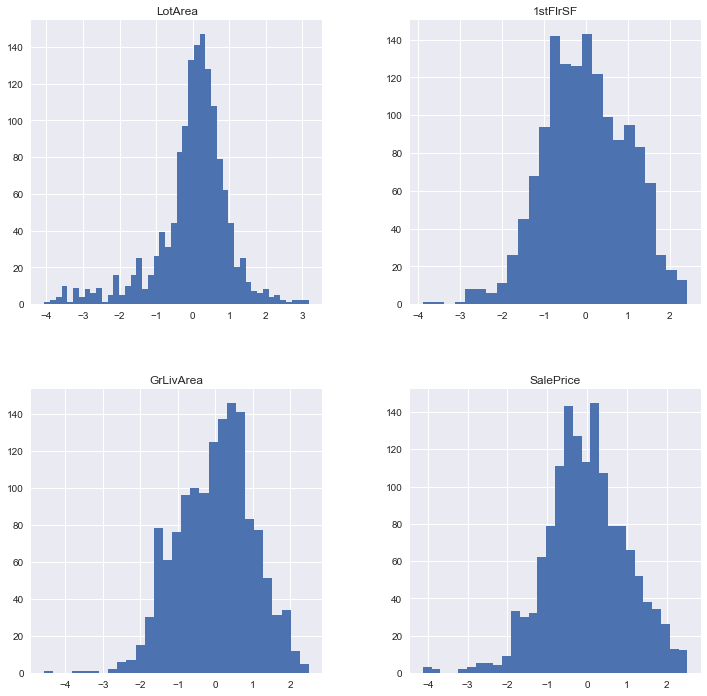

In [12]:
# visual check for after standardizing
cont_standardize_df.hist(figsize = [12,12], bins='auto')
plt.show()

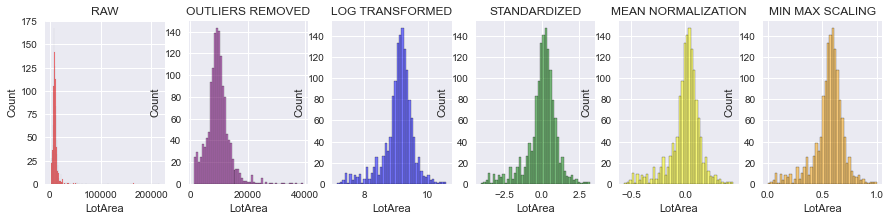

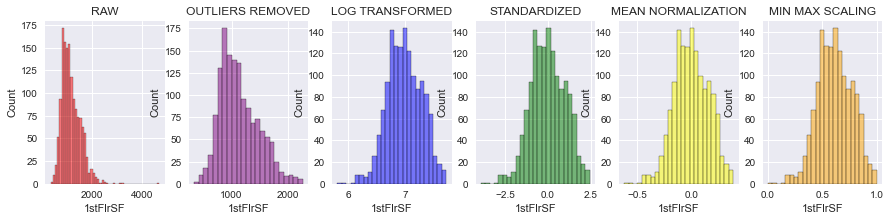

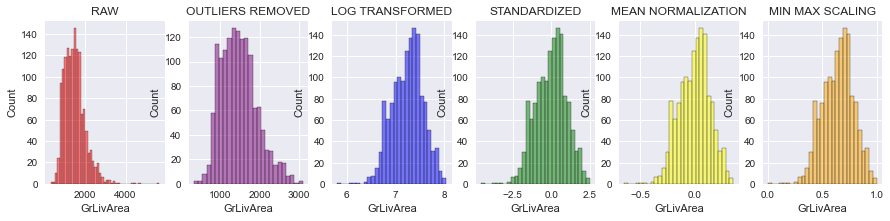

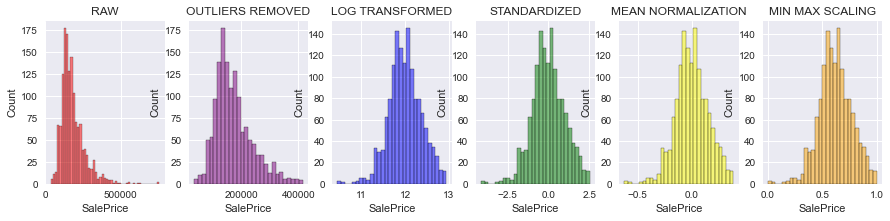

In [13]:
import seaborn as sns
columnz = list(cont_standardize_df.columns)

i=0
for i in range(len(columnz)):
    fig, axes = plt.subplots(1, 6, figsize=(15, 3))
    #fig.suptitle(f'{columnz[i]}')
    
    sns.histplot(ax=axes[0], data=continuous_df[columnz[i]], bins='auto', color='red', alpha=.5)\
    .set(title="RAW")
    
    sns.histplot(ax=axes[1], data=continuous_filtered[columnz[i]], bins='auto', color='purple', alpha=.5)\
    .set(title="OUTLIERS REMOVED")
    
    sns.histplot(ax=axes[2], data=cont_log_df[columnz[i]], bins='auto', color='blue', alpha=.5)\
    .set(title="LOG TRANSFORMED")
    
    sns.histplot(ax=axes[3], data=cont_standardize_df[columnz[i]], bins='auto', color='green', alpha=.5)\
    .set(title="STANDARDIZED")
    
    sns.histplot(ax=axes[4], data=cont_mean_norm_df[columnz[i]], bins='auto', color='yellow', alpha=.5)\
    .set(title="MEAN NORMALIZATION")
    
    sns.histplot(ax=axes[5], data=cont_min_max_df[columnz[i]], bins='auto', color='orange', alpha=.5)\
    .set(title="MIN MAX SCALING")
    
    plt.show();
    i+=1
    

## Categorical Features

In [14]:
# One hot encode categoricals
dummies_df = pd.get_dummies(categoricals_df, drop_first=True)

## Combine Categorical and Continuous Features

In [15]:
# combine features into a single dataframe called preprocessed
preprocessed = pd.concat([cont_standardize_df, dummies_df], axis=1)

## Run a linear model with SalePrice as the target variable in statsmodels

In [16]:
# Your code here

# check if any nulls in df, it wont work if there are nulls
preprocessed.isnull().values.any() 

True

In [17]:
# how many null?
preprocessed.isnull().sum()

LotArea                 46
1stFlrSF                46
GrLivArea               46
SalePrice               46
BldgType_2fmCon          0
BldgType_Duplex          0
BldgType_Twnhs           0
BldgType_TwnhsE          0
KitchenQual_Fa           0
KitchenQual_Gd           0
KitchenQual_TA           0
SaleType_CWD             0
SaleType_Con             0
SaleType_ConLD           0
SaleType_ConLI           0
SaleType_ConLw           0
SaleType_New             0
SaleType_Oth             0
SaleType_WD              0
MSZoning_FV              0
MSZoning_RH              0
MSZoning_RL              0
MSZoning_RM              0
Street_Pave              0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
Neighborhood_ClearCr     0
Neighborhood_CollgCr     0
Neighborhood_Crawfor     0
Neighborhood_Edwards     0
Neighborhood_Gilbert     0
Neighborhood_IDOTRR      0
Neighborhood_MeadowV     0
Neighborhood_Mitchel     0
Neighborhood_NAmes       0
Neighborhood_NPkVill     0
N

In [18]:
# not significant amount so ok to drop nulls
preprocessed = preprocessed.dropna()
# realized after, this is from dropping outliers

In [19]:
import statsmodels.api as sm

# identify target variable
target_var = 'SalePrice'

# all others in df are predictors
predictors = preprocessed.drop(target_var, axis=1)

# use statsmodels.api 
predictor_ints = sm.add_constant(predictors)
model = sm.OLS(preprocessed[target_var],predictor_ints).fit()

# print out summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     143.3
Date:                Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                        10:36:55   Log-Likelihood:                -747.41
No. Observations:                1414   AIC:                             1591.
Df Residuals:                    1366   BIC:                             1843.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1493      0.280     -0.533      0.594      -0.699       0.400
LotArea                  0.1091      0.021      5.278      0.000       0.069       0.150
1stFlrSF                 0.1458      0.016      9.121      0.000       0.114       0.177
GrLivArea                0.3801      0.016     24.389      0.000       0.350       0.411
BldgType_2fmCon         -0.1857      0.083     -2.234      0.026      -0.349      -0.023
BldgType_Duplex         -0.4545      0.063     -7.161      0.000      -0.579      -0.330
BldgType_Twnhs          -0.0832      0.098     -0.848      0.396      -0.276       0.109
BldgType_TwnhsE          0.0080      0.063      0.127      0.899      -0.115       0.131
KitchenQual_Fa          -1.0711      0.093    -11.565      0.000      -1.253      -0.889
KitchenQual_Gd          -0.3839      0.055     -7.008      0.000      -0.491      -0.276
KitchenQual_TA          -0.6952      0.059    -11.726      0.000      -0.811      -0.579
SaleType_CWD             0.2343      0.221      1.062      0.289      -0.199       0.667
SaleType_Con             0.6526      0.312      2.089      0.037       0.040       1.265
SaleType_ConLD           0.3210      0.160      2.009      0.045       0.008       0.634
SaleType_ConLI          -0.1457      0.221     -0.659      0.510      -0.579       0.288
SaleType_ConLw           0.0296      0.201      0.147      0.883      -0.364       0.423
SaleType_New             0.3365      0.083      4.069      0.000       0.174       0.499
SaleType_Oth             0.1100      0.251      0.438      0.662      -0.383       0.603
SaleType_WD              0.1873      0.068      2.767      0.006       0.054       0.320
MSZoning_FV              1.1894      0.199      5.973      0.000       0.799       1.580
MSZoning_RH              0.9395      0.201      4.679      0.000       0.546       1.333
MSZoning_RL              1.1015      0.166      6.625      0.000       0.775       1.428
MSZoning_RM              1.1890      0.156      7.624      0.000       0.883       1.495
Street_Pave             -0.2994      0.202     -1.485      0.138      -0.695       0.096
Neighborhood_Blueste     0.1116      0.326      0.343      0.732      -0.527       0.751
Neighborhood_BrDale     -0.4432      0.175     -2.529      0.012      -0.787      -0.099
Neighborhood_BrkSide    -0.6200      0.141     -4.382      0.000      -0.898      -0.342
Neighborhood_ClearCr    -0.2179      0.152     -1.431      0.153      -0.517       0.081
Neighborhood_CollgCr    -0.0437      0.123     -0.356      0.722      -0.284       0.197
Neighborhood_Crawfor    -0.0434      0.134     -0.323      0.746      -0.306       0.220
Neighborhood_Edwards    -0.7077      0.128     -5.513      0.000      -0.959      -0.456
Neighborhood_Gilbert    -0.0542      0.131     -0.416    

## Run the same model in scikit-learn

In [20]:
# Your code here - Check that the coefficients and intercept are the same as those from Statsmodels
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(predictors, preprocessed[target_var])

# coefficients
linreg.coef_

array([ 0.10905412,  0.14581808,  0.380077  , -0.18572856, -0.45447038,
       -0.08318827,  0.0079876 , -1.07110246, -0.38385403, -0.69517415,
        0.23433632,  0.65257619,  0.32098348, -0.14570041,  0.02960313,
        0.33648434,  0.11003097,  0.18726713,  1.18941548,  0.93953047,
        1.10154628,  1.18897938, -0.29939863,  0.11161776, -0.44322071,
       -0.61995708, -0.21789293, -0.04365754, -0.04338037, -0.70767972,
       -0.05424722, -0.9448428 , -0.69372185, -0.2287185 , -0.42064767,
       -0.00787341, -0.24378868,  0.32180195,  0.33491192, -0.93716679,
       -0.70645759, -0.45697687, -0.21195725,  0.11860263,  0.39588662,
        0.07752742,  0.08835173])

In [21]:
# intercept
linreg.intercept_

-0.14933122079248848

In [22]:
# make dictionary  
def make_intcep_coeffs_dic(df, target_variable):
    """
    takes in a pandas dataframe and target_variable 
    (intercept) as a string, ie column name, and returns
    dictionary with target-variable y-intercept and
    predictor coefficients 
    """

    # remove target from df
    predictors = df.drop(target_variable, axis=1)
    
    # import the magic sauce
    from sklearn.linear_model import LinearRegression
    linreg = LinearRegression()
    linreg.fit(predictors, df[target_variable])
    
    # get the what will become the values
    predictors_coeffs = list(linreg.coef_)
    target_y_int = linreg.intercept_

    # put 'em togetha and whatta got? Bib itty bop itty Bo!
    predictors_coeffs.insert(0,target_y_int)

    # give it a new name
    all_values = predictors_coeffs

    # what will become the keys...
    predictor_names = list(predictors.columns)
    predictor_names.insert(0, target_variable)

    # give it a new name
    all_keys = predictor_names

    # zip into dictionary
    return dict(zip(all_keys, all_values))
    

In [23]:
# test your function:
function_test = make_intcep_coeffs_dic(preprocessed, 'SalePrice')
function_test
# as a df
#pd.DataFrame.from_dict(function_test, orient ='index').T

{'SalePrice': -0.14933122079248848,
 'LotArea': 0.1090541201385892,
 '1stFlrSF': 0.1458180756517603,
 'GrLivArea': 0.38007700351121165,
 'BldgType_2fmCon': -0.18572855757619836,
 'BldgType_Duplex': -0.4544703800250557,
 'BldgType_Twnhs': -0.08318827376086524,
 'BldgType_TwnhsE': 0.007987599548871667,
 'KitchenQual_Fa': -1.0711024572519718,
 'KitchenQual_Gd': -0.3838540253720494,
 'KitchenQual_TA': -0.6951741506630994,
 'SaleType_CWD': 0.23433632330579954,
 'SaleType_Con': 0.6525761890028605,
 'SaleType_ConLD': 0.32098348147406375,
 'SaleType_ConLI': -0.14570041012483242,
 'SaleType_ConLw': 0.029603132346325743,
 'SaleType_New': 0.33648433735106736,
 'SaleType_Oth': 0.11003096862736036,
 'SaleType_WD': 0.18726712811274912,
 'MSZoning_FV': 1.1894154781318482,
 'MSZoning_RH': 0.93953046684439,
 'MSZoning_RL': 1.1015462761132115,
 'MSZoning_RM': 1.1889793802963993,
 'Street_Pave': -0.2993986334037543,
 'Neighborhood_Blueste': 0.11161776400436269,
 'Neighborhood_BrDale': -0.4432207060391314

## Predict the house price given the following characteristics (before manipulation!!)

Make sure to transform your variables as needed!

- LotArea: 14977
- 1stFlrSF: 1976
- GrLivArea: 1976
- BldgType: 1Fam
- KitchenQual: Gd
- SaleType: New
- MSZoning: RL
- Street: Pave
- Neighborhood: NridgHt

In [24]:
# Your code here - predict the house price given the following characteristics

# 1. make that list a dictionary, thank you copy/paste
predict_dict = {'LotArea' : 14977,
                '1stFlrSF': 1976,
                'GrLivArea': 1976,
                'BldgType': '1Fam',
                'KitchenQual': 'Gd',
                'SaleType': 'New',
                'MSZoning': 'RL',
                'Street': 'Pave',
                'Neighborhood': 'NridgHt'}


In [25]:
# 2. check if predict_dict keys match column names from continuous(minus target variable) and categorical, 
# ie do we have a value for every column/variable?
# this might be an unneccessary step, ask instructor

# make a copy so you dont mess anything up
copy_continuous = continuous.copy()

# remove target variable from the list
copy_continuous.remove(target_var)

# check if dict keys match column names
list(copy_continuous + categoricals) == list(predict_dict.keys())

True

In [26]:
# cool, it's True, we can keep going

# 3. log transform the continous variables
# if value from predict_dict IS NOT a string (ie, in this case, continuous variables): 
# np.log(value) and .astype(float), it will not work unless a float
logged_cont_vars_dict = {k:(np.log(v).astype(float)) for k,v in \
                         predict_dict.items() if type(v) != str}

# standardize
# use continuous_filtered df because it has outliers removed
for k,v in logged_cont_vars_dict.items():
    logged_cont_vars_dict[k] = ((v - continuous_filtered[k].mean())/\
                                (continuous_filtered[k].std()))
#check
logged_cont_vars_dict
#outliersremoved: -2.32483, -3.282145, -3.216253
#not removing outliers: -1.052694, -2.987777, -2.869517

{'LotArea': -2.3248302149191367,
 '1stFlrSF': -3.2821450295377446,
 'GrLivArea': -3.2162527551999776}

In [27]:
# 4. categorical variables
# make categorical variables dictionary: in this case, if value IS a string
cat_vars_dict = {k:v for k,v in predict_dict.items() if type(v) == str}

# make a dict of dummies.columns and zeros
boolean_dict = dict(zip(dummies_df.columns, \
                              [0 for i in range(len(dummies_df.columns))]))

# use boolean_dict and cat_vars_dict to make key_dictionary
key_dict = {f'{k}_{v}':1 for k,v in cat_vars_dict.items() \
 if f'{k}_{v}' in boolean_dict.keys()}

# use key_dict to change boolean_dict
boolean_cat_dict = {key : key_dict.get(key, val) \
                    for key, val in boolean_dict.items()}     
#check
boolean_cat_dict

{'BldgType_2fmCon': 0,
 'BldgType_Duplex': 0,
 'BldgType_Twnhs': 0,
 'BldgType_TwnhsE': 0,
 'KitchenQual_Fa': 0,
 'KitchenQual_Gd': 1,
 'KitchenQual_TA': 0,
 'SaleType_CWD': 0,
 'SaleType_Con': 0,
 'SaleType_ConLD': 0,
 'SaleType_ConLI': 0,
 'SaleType_ConLw': 0,
 'SaleType_New': 1,
 'SaleType_Oth': 0,
 'SaleType_WD': 0,
 'MSZoning_FV': 0,
 'MSZoning_RH': 0,
 'MSZoning_RL': 1,
 'MSZoning_RM': 0,
 'Street_Pave': 1,
 'Neighborhood_Blueste': 0,
 'Neighborhood_BrDale': 0,
 'Neighborhood_BrkSide': 0,
 'Neighborhood_ClearCr': 0,
 'Neighborhood_CollgCr': 0,
 'Neighborhood_Crawfor': 0,
 'Neighborhood_Edwards': 0,
 'Neighborhood_Gilbert': 0,
 'Neighborhood_IDOTRR': 0,
 'Neighborhood_MeadowV': 0,
 'Neighborhood_Mitchel': 0,
 'Neighborhood_NAmes': 0,
 'Neighborhood_NPkVill': 0,
 'Neighborhood_NWAmes': 0,
 'Neighborhood_NoRidge': 0,
 'Neighborhood_NridgHt': 1,
 'Neighborhood_OldTown': 0,
 'Neighborhood_SWISU': 0,
 'Neighborhood_Sawyer': 0,
 'Neighborhood_SawyerW': 0,
 'Neighborhood_Somerst': 0,
 'N

In [28]:
# 5. combine the two dictionaries
logged_cont_vars_dict.update(boolean_cat_dict)

#rename for ease
final_dict = logged_cont_vars_dict

In [29]:
# 6. make a model
# convert final_dict to a data frame
final_df = pd.DataFrame.from_dict(final_dict, orient ='index').T

#check
final_df

,LotArea,1stFlrSF,GrLivArea,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,-2.32483,-3.282145,-3.216253,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# 6.(cont.) 
# use sklearn.linear_model.LinearRegression.predict (saved as linreg)
logged_standardized_predict = linreg.predict(final_df)

# undo log and standardization
# prediction needs to be rescaled and exponentiated
# use continuous_filtered df because it has outliers removed
final_prediction = (np.exp(logged_standardized_predict) * \
                    continuous_filtered["SalePrice"].std()) + \
                    continuous_filtered["SalePrice"].mean()

# check
final_prediction

array([197841.89210178])

## Summary
Congratulations! You pre-processed the Ames Housing data using scaling and standardization. You also fitted your first multiple linear regression model on the Ames Housing data using statsmodels and scikit-learn!